<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9360797	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.9161977	total: 63.8ms	remaining: 31.8s
2:	learn: 0.8953310	total: 67ms	remaining: 22.3s
3:	learn: 0.8797020	total: 69.5ms	remaining: 17.3s
4:	learn: 0.8637437	total: 71.9ms	remaining: 14.3s
5:	learn: 0.8471767	total: 73.5ms	remaining: 12.2s
6:	learn: 0.8320251	total: 75.8ms	remaining: 10.8s
7:	learn: 0.8160279	total: 78.1ms	remaining: 9.69s
8:	learn: 0.8008045	total: 83ms	remaining: 9.13s
9:	learn: 0.7840365	total: 87.1ms	remaining: 8.63s
10:	learn: 0.7682714	total: 93.8ms	remaining: 8.43s
11:	learn: 0.7559555	total: 98.9ms	remaining: 8.15s
12:	learn: 0.7411184	total: 104ms	remaining: 7.88s
13:	learn: 0.7269227	total: 109ms	remaining: 7.68s
14:	learn: 0.7147521	total: 112ms	remaining: 7.33s
15:	learn: 0.7015067	total: 119ms	remaining: 7.31s
16:	learn: 0.6902238	total: 123ms	remaining: 7.14s
17:	learn: 0.6780241	total: 126ms	remaining: 6.86s
18:	learn: 0.6659223	total: 128ms	remaining: 6.63s
19:	

26:	learn: 0.5859053	total: 153ms	remaining: 5.52s
27:	learn: 0.5771129	total: 157ms	remaining: 5.43s
28:	learn: 0.5678968	total: 159ms	remaining: 5.33s
29:	learn: 0.5575742	total: 162ms	remaining: 5.23s
30:	learn: 0.5484900	total: 164ms	remaining: 5.13s
31:	learn: 0.5406694	total: 166ms	remaining: 5.03s
32:	learn: 0.5340442	total: 169ms	remaining: 4.97s
33:	learn: 0.5268695	total: 172ms	remaining: 4.9s
34:	learn: 0.5197030	total: 176ms	remaining: 4.84s
35:	learn: 0.5124610	total: 186ms	remaining: 4.98s


36:	learn: 0.5058520	total: 299ms	remaining: 7.79s
37:	learn: 0.4985889	total: 303ms	remaining: 7.66s
38:	learn: 0.4910299	total: 314ms	remaining: 7.73s
39:	learn: 0.4840636	total: 319ms	remaining: 7.66s
40:	learn: 0.4792267	total: 322ms	remaining: 7.53s
41:	learn: 0.4730577	total: 341ms	remaining: 7.78s
42:	learn: 0.4690543	total: 342ms	remaining: 7.61s
43:	learn: 0.4640360	total: 345ms	remaining: 7.5s
44:	learn: 0.4582980	total: 350ms	remaining: 7.42s
45:	learn: 0.4535425	total: 355ms	remaining: 7.36s
46:	learn: 0.4483452	total: 358ms	remaining: 7.25s
47:	learn: 0.4430704	total: 360ms	remaining: 7.14s
48:	learn: 0.4376818	total: 363ms	remaining: 7.05s
49:	learn: 0.4331612	total: 365ms	remaining: 6.94s
50:	learn: 0.4281963	total: 367ms	remaining: 6.83s
51:	learn: 0.4228457	total: 371ms	remaining: 6.76s
52:	learn: 0.4174772	total: 375ms	remaining: 6.7s
53:	learn: 0.4132406	total: 378ms	remaining: 6.61s
54:	learn: 0.4079309	total: 382ms	remaining: 6.56s
55:	learn: 0.4044424	total: 388ms

58:	learn: 0.3929331	total: 444ms	remaining: 7.09s
59:	learn: 0.3891198	total: 473ms	remaining: 7.41s
60:	learn: 0.3857990	total: 482ms	remaining: 7.42s
61:	learn: 0.3828784	total: 488ms	remaining: 7.38s
62:	learn: 0.3788651	total: 492ms	remaining: 7.31s
63:	learn: 0.3747507	total: 498ms	remaining: 7.29s
64:	learn: 0.3703906	total: 503ms	remaining: 7.24s
65:	learn: 0.3675794	total: 509ms	remaining: 7.21s
66:	learn: 0.3648984	total: 512ms	remaining: 7.13s
67:	learn: 0.3622882	total: 515ms	remaining: 7.06s
68:	learn: 0.3590725	total: 519ms	remaining: 7s
69:	learn: 0.3566851	total: 525ms	remaining: 6.98s
70:	learn: 0.3540802	total: 529ms	remaining: 6.92s
71:	learn: 0.3518879	total: 533ms	remaining: 6.87s
72:	learn: 0.3492156	total: 537ms	remaining: 6.82s
73:	learn: 0.3470105	total: 542ms	remaining: 6.78s
74:	learn: 0.3439086	total: 546ms	remaining: 6.73s
75:	learn: 0.3419377	total: 551ms	remaining: 6.7s
76:	learn: 0.3395243	total: 568ms	remaining: 6.81s
77:	learn: 0.3366562	total: 574ms	r

84:	learn: 0.3202757	total: 619ms	remaining: 6.66s
85:	learn: 0.3183793	total: 622ms	remaining: 6.61s
86:	learn: 0.3164304	total: 625ms	remaining: 6.56s
87:	learn: 0.3142618	total: 626ms	remaining: 6.49s
88:	learn: 0.3119208	total: 629ms	remaining: 6.44s
89:	learn: 0.3092327	total: 631ms	remaining: 6.38s
90:	learn: 0.3077371	total: 637ms	remaining: 6.36s
91:	learn: 0.3063472	total: 649ms	remaining: 6.41s
92:	learn: 0.3042218	total: 652ms	remaining: 6.36s
93:	learn: 0.3024143	total: 665ms	remaining: 6.41s
94:	learn: 0.3002485	total: 668ms	remaining: 6.36s
95:	learn: 0.2989177	total: 671ms	remaining: 6.32s
96:	learn: 0.2973690	total: 677ms	remaining: 6.3s
97:	learn: 0.2958285	total: 682ms	remaining: 6.28s
98:	learn: 0.2944787	total: 685ms	remaining: 6.24s
99:	learn: 0.2928580	total: 689ms	remaining: 6.2s
100:	learn: 0.2916062	total: 713ms	remaining: 6.34s
101:	learn: 0.2900660	total: 719ms	remaining: 6.33s
102:	learn: 0.2889019	total: 723ms	remaining: 6.29s
103:	learn: 0.2877328	total: 7

105:	learn: 0.2854055	total: 748ms	remaining: 6.3s
106:	learn: 0.2831632	total: 750ms	remaining: 6.26s
107:	learn: 0.2814310	total: 772ms	remaining: 6.38s
108:	learn: 0.2803905	total: 780ms	remaining: 6.38s
109:	learn: 0.2794769	total: 783ms	remaining: 6.34s
110:	learn: 0.2783843	total: 790ms	remaining: 6.33s
111:	learn: 0.2772320	total: 806ms	remaining: 6.39s
112:	learn: 0.2757327	total: 813ms	remaining: 6.38s
113:	learn: 0.2744180	total: 826ms	remaining: 6.42s


114:	learn: 0.2732947	total: 831ms	remaining: 6.39s
115:	learn: 0.2726903	total: 842ms	remaining: 6.42s
116:	learn: 0.2713980	total: 856ms	remaining: 6.46s
117:	learn: 0.2703189	total: 871ms	remaining: 6.51s
118:	learn: 0.2692884	total: 873ms	remaining: 6.46s
119:	learn: 0.2683979	total: 875ms	remaining: 6.42s
120:	learn: 0.2674558	total: 878ms	remaining: 6.38s
121:	learn: 0.2667924	total: 880ms	remaining: 6.33s
122:	learn: 0.2655919	total: 883ms	remaining: 6.3s
123:	learn: 0.2646013	total: 886ms	remaining: 6.26s
124:	learn: 0.2636179	total: 890ms	remaining: 6.23s
125:	learn: 0.2627262	total: 893ms	remaining: 6.19s
126:	learn: 0.2613314	total: 896ms	remaining: 6.16s
127:	learn: 0.2607565	total: 900ms	remaining: 6.13s
128:	learn: 0.2596195	total: 903ms	remaining: 6.1s
129:	learn: 0.2586658	total: 907ms	remaining: 6.07s
130:	learn: 0.2580201	total: 910ms	remaining: 6.03s
131:	learn: 0.2569488	total: 912ms	remaining: 6s
132:	learn: 0.2558842	total: 915ms	remaining: 5.96s
133:	learn: 0.255

154:	learn: 0.2407307	total: 983ms	remaining: 5.36s
155:	learn: 0.2397516	total: 986ms	remaining: 5.33s
156:	learn: 0.2390844	total: 989ms	remaining: 5.31s
157:	learn: 0.2383619	total: 996ms	remaining: 5.3s
158:	learn: 0.2378143	total: 1000ms	remaining: 5.29s
159:	learn: 0.2373916	total: 1s	remaining: 5.27s
160:	learn: 0.2366285	total: 1.01s	remaining: 5.27s
161:	learn: 0.2364852	total: 1.01s	remaining: 5.25s
162:	learn: 0.2358344	total: 1.02s	remaining: 5.23s
163:	learn: 0.2355536	total: 1.02s	remaining: 5.21s
164:	learn: 0.2348153	total: 1.02s	remaining: 5.18s
165:	learn: 0.2342635	total: 1.03s	remaining: 5.18s
166:	learn: 0.2337690	total: 1.05s	remaining: 5.23s
167:	learn: 0.2327039	total: 1.05s	remaining: 5.21s
168:	learn: 0.2323941	total: 1.05s	remaining: 5.19s
169:	learn: 0.2320126	total: 1.06s	remaining: 5.17s
170:	learn: 0.2316687	total: 1.06s	remaining: 5.14s
171:	learn: 0.2310401	total: 1.06s	remaining: 5.12s
172:	learn: 0.2307482	total: 1.07s	remaining: 5.1s
173:	learn: 0.23

176:	learn: 0.2285340	total: 1.14s	remaining: 5.28s
177:	learn: 0.2279680	total: 1.16s	remaining: 5.34s
178:	learn: 0.2278595	total: 1.16s	remaining: 5.31s
179:	learn: 0.2274406	total: 1.16s	remaining: 5.29s
180:	learn: 0.2267303	total: 1.16s	remaining: 5.27s
181:	learn: 0.2261132	total: 1.17s	remaining: 5.25s
182:	learn: 0.2256421	total: 1.17s	remaining: 5.22s
183:	learn: 0.2251893	total: 1.17s	remaining: 5.19s
184:	learn: 0.2247521	total: 1.17s	remaining: 5.17s
185:	learn: 0.2240415	total: 1.17s	remaining: 5.14s
186:	learn: 0.2233021	total: 1.18s	remaining: 5.11s
187:	learn: 0.2229550	total: 1.18s	remaining: 5.09s
188:	learn: 0.2222038	total: 1.18s	remaining: 5.07s
189:	learn: 0.2216512	total: 1.18s	remaining: 5.05s
190:	learn: 0.2209000	total: 1.19s	remaining: 5.03s
191:	learn: 0.2202783	total: 1.19s	remaining: 5.02s
192:	learn: 0.2193941	total: 1.21s	remaining: 5.06s
193:	learn: 0.2189875	total: 1.22s	remaining: 5.07s
194:	learn: 0.2183712	total: 1.22s	remaining: 5.04s
195:	learn: 

226:	learn: 0.2036400	total: 1.39s	remaining: 4.73s
227:	learn: 0.2031042	total: 1.39s	remaining: 4.71s
228:	learn: 0.2026944	total: 1.39s	remaining: 4.69s
229:	learn: 0.2023806	total: 1.4s	remaining: 4.68s
230:	learn: 0.2021296	total: 1.4s	remaining: 4.67s
231:	learn: 0.2018593	total: 1.41s	remaining: 4.65s
232:	learn: 0.2012079	total: 1.41s	remaining: 4.64s
233:	learn: 0.2007907	total: 1.42s	remaining: 4.65s
234:	learn: 0.2004939	total: 1.42s	remaining: 4.63s
235:	learn: 0.1998683	total: 1.43s	remaining: 4.62s
236:	learn: 0.1994409	total: 1.43s	remaining: 4.6s
237:	learn: 0.1990469	total: 1.43s	remaining: 4.58s
238:	learn: 0.1986159	total: 1.43s	remaining: 4.56s
239:	learn: 0.1982485	total: 1.43s	remaining: 4.54s
240:	learn: 0.1977719	total: 1.44s	remaining: 4.53s
241:	learn: 0.1972348	total: 1.44s	remaining: 4.51s
242:	learn: 0.1966388	total: 1.44s	remaining: 4.49s
243:	learn: 0.1964042	total: 1.44s	remaining: 4.47s
244:	learn: 0.1958978	total: 1.45s	remaining: 4.45s
245:	learn: 0.1

263:	learn: 0.1890007	total: 1.5s	remaining: 4.18s
264:	learn: 0.1888277	total: 1.5s	remaining: 4.17s
265:	learn: 0.1884572	total: 1.5s	remaining: 4.15s
266:	learn: 0.1881806	total: 1.51s	remaining: 4.14s
267:	learn: 0.1875310	total: 1.51s	remaining: 4.12s
268:	learn: 0.1870829	total: 1.51s	remaining: 4.11s
269:	learn: 0.1868837	total: 1.51s	remaining: 4.09s
270:	learn: 0.1866649	total: 1.52s	remaining: 4.08s
271:	learn: 0.1862920	total: 1.52s	remaining: 4.07s
272:	learn: 0.1858564	total: 1.52s	remaining: 4.05s
273:	learn: 0.1853722	total: 1.52s	remaining: 4.04s
274:	learn: 0.1850197	total: 1.53s	remaining: 4.03s
275:	learn: 0.1845254	total: 1.53s	remaining: 4.01s
276:	learn: 0.1840351	total: 1.53s	remaining: 4s
277:	learn: 0.1838476	total: 1.53s	remaining: 3.98s
278:	learn: 0.1834112	total: 1.54s	remaining: 3.98s
279:	learn: 0.1829507	total: 1.54s	remaining: 3.96s
280:	learn: 0.1826054	total: 1.54s	remaining: 3.95s
281:	learn: 0.1822333	total: 1.55s	remaining: 3.94s
282:	learn: 0.1819

332:	learn: 0.1635306	total: 1.68s	remaining: 3.36s
333:	learn: 0.1629984	total: 1.68s	remaining: 3.35s
334:	learn: 0.1626641	total: 1.68s	remaining: 3.34s
335:	learn: 0.1623030	total: 1.69s	remaining: 3.33s
336:	learn: 0.1618987	total: 1.69s	remaining: 3.32s
337:	learn: 0.1615358	total: 1.69s	remaining: 3.31s
338:	learn: 0.1612313	total: 1.69s	remaining: 3.3s
339:	learn: 0.1607960	total: 1.69s	remaining: 3.29s
340:	learn: 0.1603172	total: 1.7s	remaining: 3.28s
341:	learn: 0.1597180	total: 1.7s	remaining: 3.27s
342:	learn: 0.1591793	total: 1.7s	remaining: 3.26s
343:	learn: 0.1587845	total: 1.7s	remaining: 3.25s
344:	learn: 0.1584404	total: 1.71s	remaining: 3.24s
345:	learn: 0.1581039	total: 1.71s	remaining: 3.23s
346:	learn: 0.1576769	total: 1.71s	remaining: 3.22s
347:	learn: 0.1571564	total: 1.71s	remaining: 3.21s
348:	learn: 0.1567065	total: 1.72s	remaining: 3.2s
349:	learn: 0.1563642	total: 1.72s	remaining: 3.19s
350:	learn: 0.1559319	total: 1.72s	remaining: 3.18s
351:	learn: 0.1556

391:	learn: 0.1421785	total: 1.85s	remaining: 2.87s
392:	learn: 0.1419643	total: 1.85s	remaining: 2.86s
393:	learn: 0.1416280	total: 1.85s	remaining: 2.85s
394:	learn: 0.1412914	total: 1.86s	remaining: 2.84s
395:	learn: 0.1407938	total: 1.86s	remaining: 2.83s
396:	learn: 0.1402861	total: 1.86s	remaining: 2.83s
397:	learn: 0.1401968	total: 1.86s	remaining: 2.82s
398:	learn: 0.1398480	total: 1.87s	remaining: 2.81s
399:	learn: 0.1395444	total: 1.87s	remaining: 2.81s
400:	learn: 0.1392443	total: 1.88s	remaining: 2.8s
401:	learn: 0.1391787	total: 1.88s	remaining: 2.8s
402:	learn: 0.1388744	total: 1.89s	remaining: 2.79s
403:	learn: 0.1384969	total: 1.89s	remaining: 2.79s
404:	learn: 0.1381857	total: 1.89s	remaining: 2.78s
405:	learn: 0.1377765	total: 1.89s	remaining: 2.77s
406:	learn: 0.1377072	total: 1.9s	remaining: 2.76s
407:	learn: 0.1372640	total: 1.9s	remaining: 2.76s
408:	learn: 0.1372056	total: 1.9s	remaining: 2.75s
409:	learn: 0.1371687	total: 1.9s	remaining: 2.74s
410:	learn: 0.1370

451:	learn: 0.1279379	total: 2.02s	remaining: 2.45s
452:	learn: 0.1276222	total: 2.02s	remaining: 2.44s
453:	learn: 0.1273575	total: 2.02s	remaining: 2.43s
454:	learn: 0.1271042	total: 2.02s	remaining: 2.42s
455:	learn: 0.1267277	total: 2.03s	remaining: 2.42s
456:	learn: 0.1265291	total: 2.03s	remaining: 2.41s
457:	learn: 0.1262128	total: 2.03s	remaining: 2.4s
458:	learn: 0.1259320	total: 2.04s	remaining: 2.4s
459:	learn: 0.1257073	total: 2.04s	remaining: 2.39s
460:	learn: 0.1256071	total: 2.04s	remaining: 2.39s
461:	learn: 0.1255674	total: 2.04s	remaining: 2.38s
462:	learn: 0.1253103	total: 2.04s	remaining: 2.37s
463:	learn: 0.1250673	total: 2.05s	remaining: 2.37s
464:	learn: 0.1247527	total: 2.05s	remaining: 2.36s
465:	learn: 0.1244077	total: 2.05s	remaining: 2.35s
466:	learn: 0.1243615	total: 2.06s	remaining: 2.35s
467:	learn: 0.1243121	total: 2.06s	remaining: 2.34s
468:	learn: 0.1239762	total: 2.06s	remaining: 2.33s
469:	learn: 0.1237716	total: 2.06s	remaining: 2.33s
470:	learn: 0.

531:	learn: 0.1103054	total: 2.2s	remaining: 1.94s
532:	learn: 0.1102362	total: 2.2s	remaining: 1.93s
533:	learn: 0.1099831	total: 2.2s	remaining: 1.92s
534:	learn: 0.1096950	total: 2.21s	remaining: 1.92s
535:	learn: 0.1096526	total: 2.21s	remaining: 1.91s
536:	learn: 0.1094296	total: 2.21s	remaining: 1.91s
537:	learn: 0.1091103	total: 2.21s	remaining: 1.9s
538:	learn: 0.1087615	total: 2.21s	remaining: 1.89s
539:	learn: 0.1085764	total: 2.22s	remaining: 1.89s
540:	learn: 0.1085130	total: 2.22s	remaining: 1.88s
541:	learn: 0.1083138	total: 2.22s	remaining: 1.88s
542:	learn: 0.1081227	total: 2.22s	remaining: 1.87s
543:	learn: 0.1078796	total: 2.23s	remaining: 1.87s
544:	learn: 0.1076277	total: 2.23s	remaining: 1.86s
545:	learn: 0.1074507	total: 2.23s	remaining: 1.86s
546:	learn: 0.1072559	total: 2.23s	remaining: 1.85s
547:	learn: 0.1070299	total: 2.24s	remaining: 1.84s
548:	learn: 0.1068714	total: 2.24s	remaining: 1.84s
549:	learn: 0.1066266	total: 2.24s	remaining: 1.83s
550:	learn: 0.10

609:	learn: 0.0960818	total: 2.39s	remaining: 1.53s
610:	learn: 0.0958222	total: 2.39s	remaining: 1.52s
611:	learn: 0.0957987	total: 2.4s	remaining: 1.52s
612:	learn: 0.0956022	total: 2.4s	remaining: 1.51s
613:	learn: 0.0955733	total: 2.4s	remaining: 1.51s
614:	learn: 0.0952846	total: 2.4s	remaining: 1.5s
615:	learn: 0.0950897	total: 2.4s	remaining: 1.5s
616:	learn: 0.0948290	total: 2.4s	remaining: 1.49s
617:	learn: 0.0945823	total: 2.41s	remaining: 1.49s
618:	learn: 0.0944302	total: 2.41s	remaining: 1.48s
619:	learn: 0.0943515	total: 2.41s	remaining: 1.48s
620:	learn: 0.0942320	total: 2.41s	remaining: 1.47s
621:	learn: 0.0940995	total: 2.41s	remaining: 1.47s
622:	learn: 0.0940467	total: 2.42s	remaining: 1.46s
623:	learn: 0.0940064	total: 2.42s	remaining: 1.46s
624:	learn: 0.0938034	total: 2.42s	remaining: 1.45s
625:	learn: 0.0937369	total: 2.42s	remaining: 1.45s
626:	learn: 0.0936560	total: 2.42s	remaining: 1.44s
627:	learn: 0.0934237	total: 2.43s	remaining: 1.44s
628:	learn: 0.093342

685:	learn: 0.0849423	total: 2.57s	remaining: 1.18s
686:	learn: 0.0847458	total: 2.57s	remaining: 1.17s
687:	learn: 0.0846521	total: 2.57s	remaining: 1.17s
688:	learn: 0.0845134	total: 2.58s	remaining: 1.16s
689:	learn: 0.0843972	total: 2.58s	remaining: 1.16s
690:	learn: 0.0842631	total: 2.58s	remaining: 1.15s
691:	learn: 0.0841433	total: 2.58s	remaining: 1.15s
692:	learn: 0.0841057	total: 2.58s	remaining: 1.15s
693:	learn: 0.0839891	total: 2.59s	remaining: 1.14s
694:	learn: 0.0839461	total: 2.59s	remaining: 1.14s
695:	learn: 0.0837995	total: 2.59s	remaining: 1.13s
696:	learn: 0.0836801	total: 2.59s	remaining: 1.13s
697:	learn: 0.0835675	total: 2.6s	remaining: 1.12s
698:	learn: 0.0834528	total: 2.6s	remaining: 1.12s
699:	learn: 0.0832552	total: 2.6s	remaining: 1.11s
700:	learn: 0.0831164	total: 2.6s	remaining: 1.11s
701:	learn: 0.0830216	total: 2.6s	remaining: 1.1s
702:	learn: 0.0830052	total: 2.6s	remaining: 1.1s
703:	learn: 0.0829410	total: 2.61s	remaining: 1.1s
704:	learn: 0.0827285

754:	learn: 0.0767116	total: 2.75s	remaining: 891ms
755:	learn: 0.0766050	total: 2.75s	remaining: 887ms
756:	learn: 0.0764639	total: 2.75s	remaining: 883ms
757:	learn: 0.0764245	total: 2.75s	remaining: 879ms
758:	learn: 0.0763936	total: 2.75s	remaining: 875ms
759:	learn: 0.0762844	total: 2.76s	remaining: 871ms
760:	learn: 0.0762496	total: 2.76s	remaining: 867ms
761:	learn: 0.0760830	total: 2.76s	remaining: 863ms
762:	learn: 0.0758795	total: 2.77s	remaining: 859ms
763:	learn: 0.0758056	total: 2.77s	remaining: 855ms
764:	learn: 0.0756624	total: 2.77s	remaining: 851ms
765:	learn: 0.0755982	total: 2.77s	remaining: 847ms
766:	learn: 0.0754671	total: 2.77s	remaining: 843ms
767:	learn: 0.0753514	total: 2.77s	remaining: 838ms
768:	learn: 0.0752142	total: 2.78s	remaining: 834ms
769:	learn: 0.0751217	total: 2.78s	remaining: 830ms
770:	learn: 0.0749892	total: 2.78s	remaining: 826ms
771:	learn: 0.0749704	total: 2.78s	remaining: 822ms
772:	learn: 0.0747928	total: 2.79s	remaining: 818ms
773:	learn: 

836:	learn: 0.0681287	total: 2.92s	remaining: 569ms
837:	learn: 0.0680397	total: 2.93s	remaining: 566ms
838:	learn: 0.0678603	total: 2.93s	remaining: 562ms
839:	learn: 0.0676709	total: 2.93s	remaining: 559ms
840:	learn: 0.0675105	total: 2.94s	remaining: 555ms
841:	learn: 0.0674070	total: 2.94s	remaining: 551ms
842:	learn: 0.0673143	total: 2.95s	remaining: 550ms
843:	learn: 0.0672134	total: 2.95s	remaining: 546ms
844:	learn: 0.0670783	total: 2.96s	remaining: 542ms
845:	learn: 0.0669635	total: 2.96s	remaining: 539ms
846:	learn: 0.0669285	total: 2.96s	remaining: 535ms
847:	learn: 0.0667757	total: 2.96s	remaining: 531ms
848:	learn: 0.0665912	total: 2.97s	remaining: 528ms
849:	learn: 0.0665431	total: 2.97s	remaining: 524ms
850:	learn: 0.0664266	total: 2.97s	remaining: 520ms
851:	learn: 0.0663073	total: 2.97s	remaining: 516ms
852:	learn: 0.0661675	total: 2.97s	remaining: 513ms
853:	learn: 0.0660148	total: 2.98s	remaining: 509ms
854:	learn: 0.0658460	total: 2.98s	remaining: 505ms
855:	learn: 

909:	learn: 0.0609051	total: 3.09s	remaining: 306ms
910:	learn: 0.0607745	total: 3.09s	remaining: 302ms
911:	learn: 0.0606216	total: 3.09s	remaining: 299ms
912:	learn: 0.0605929	total: 3.1s	remaining: 295ms
913:	learn: 0.0605263	total: 3.1s	remaining: 292ms
914:	learn: 0.0604451	total: 3.1s	remaining: 288ms
915:	learn: 0.0603122	total: 3.1s	remaining: 285ms
916:	learn: 0.0601299	total: 3.11s	remaining: 281ms
917:	learn: 0.0600589	total: 3.11s	remaining: 278ms
918:	learn: 0.0600191	total: 3.11s	remaining: 274ms
919:	learn: 0.0599701	total: 3.11s	remaining: 271ms
920:	learn: 0.0598759	total: 3.12s	remaining: 267ms
921:	learn: 0.0597890	total: 3.12s	remaining: 264ms
922:	learn: 0.0596871	total: 3.12s	remaining: 261ms
923:	learn: 0.0595922	total: 3.13s	remaining: 257ms
924:	learn: 0.0595150	total: 3.13s	remaining: 254ms
925:	learn: 0.0594277	total: 3.13s	remaining: 250ms
926:	learn: 0.0593155	total: 3.13s	remaining: 247ms
927:	learn: 0.0592911	total: 3.13s	remaining: 243ms
928:	learn: 0.05

954:	learn: 0.0571515	total: 3.21s	remaining: 151ms
955:	learn: 0.0571029	total: 3.21s	remaining: 148ms
956:	learn: 0.0570064	total: 3.21s	remaining: 144ms
957:	learn: 0.0569253	total: 3.22s	remaining: 141ms
958:	learn: 0.0568150	total: 3.22s	remaining: 138ms
959:	learn: 0.0567638	total: 3.22s	remaining: 134ms
960:	learn: 0.0567001	total: 3.22s	remaining: 131ms
961:	learn: 0.0565755	total: 3.23s	remaining: 127ms
962:	learn: 0.0565069	total: 3.23s	remaining: 124ms
963:	learn: 0.0563684	total: 3.23s	remaining: 121ms
964:	learn: 0.0562573	total: 3.23s	remaining: 117ms
965:	learn: 0.0562240	total: 3.24s	remaining: 114ms
966:	learn: 0.0561962	total: 3.24s	remaining: 111ms
967:	learn: 0.0561425	total: 3.24s	remaining: 107ms
968:	learn: 0.0559962	total: 3.24s	remaining: 104ms
969:	learn: 0.0559582	total: 3.25s	remaining: 100ms
970:	learn: 0.0559022	total: 3.25s	remaining: 97ms
971:	learn: 0.0557827	total: 3.25s	remaining: 93.6ms
972:	learn: 0.0556800	total: 3.25s	remaining: 90.2ms
973:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2816954507192043
ABC Pre-generator MAE 0.28256128720470636


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

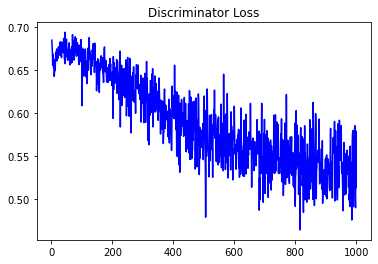

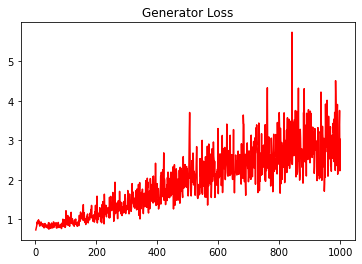

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3144762123506328


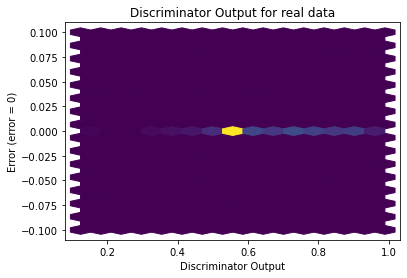

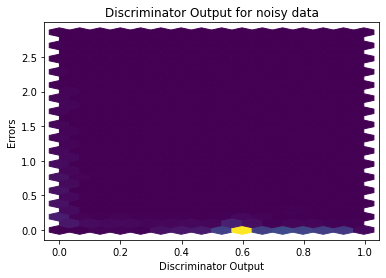

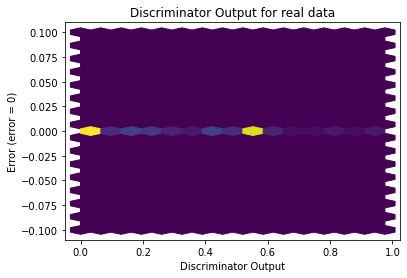

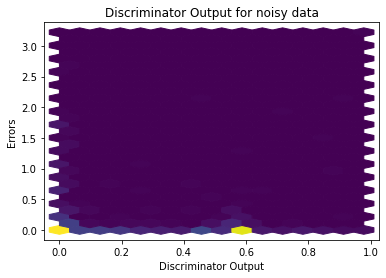

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())